# 📊 PhonePe Transaction Insights Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
# Load datasets
a_transaction = pd.read_csv("data/aggregated_transaction.csv")
a_user = pd.read_csv("data/aggregated_user.csv")
t_transaction = pd.read_csv("data/top_transaction.csv")
m_transaction = pd.read_csv("data/map_transaction_hover.csv")

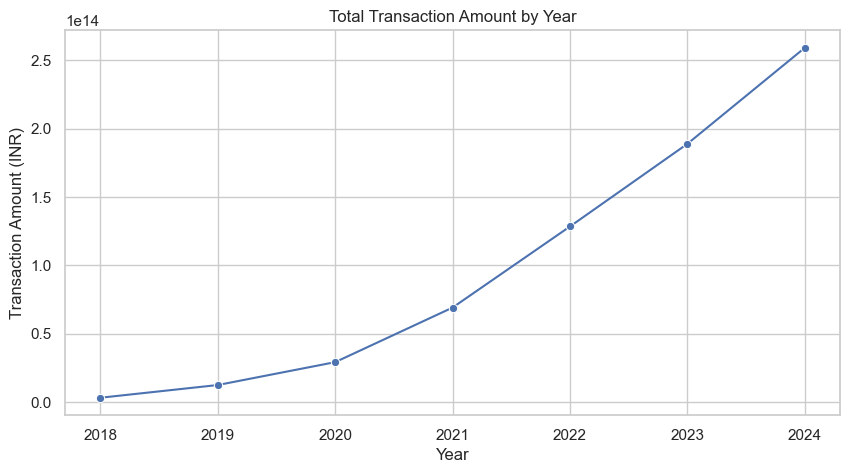

In [3]:
agg_by_year = a_transaction.groupby('year')[['transaction_count', 'transaction_amount']].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=agg_by_year, x='year', y='transaction_amount', marker='o')
plt.title("Total Transaction Amount by Year")
plt.xlabel("Year")
plt.ylabel("Transaction Amount (INR)")
plt.show()

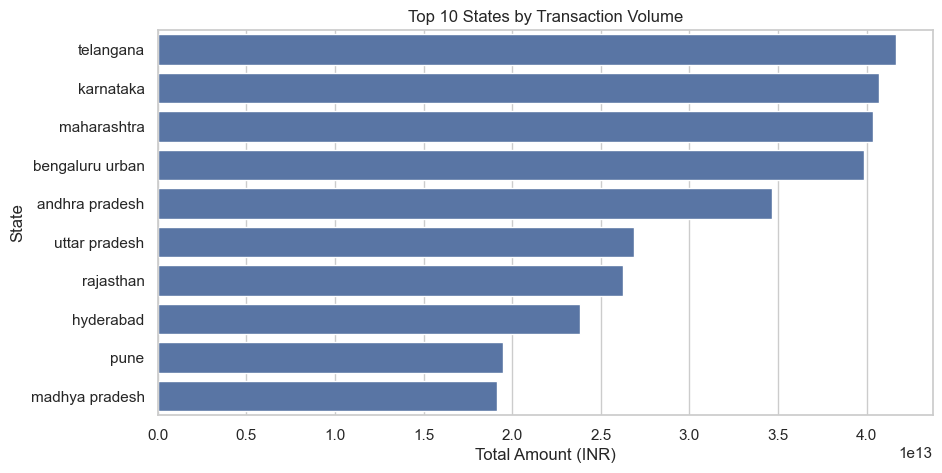

In [4]:
top_states = t_transaction.groupby('entity_name')[['count', 'amount']].sum().reset_index()
top_states = top_states.sort_values(by='amount', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_states, y='entity_name', x='amount')
plt.title("Top 10 States by Transaction Volume")
plt.xlabel("Total Amount (INR)")
plt.ylabel("State")
plt.show()

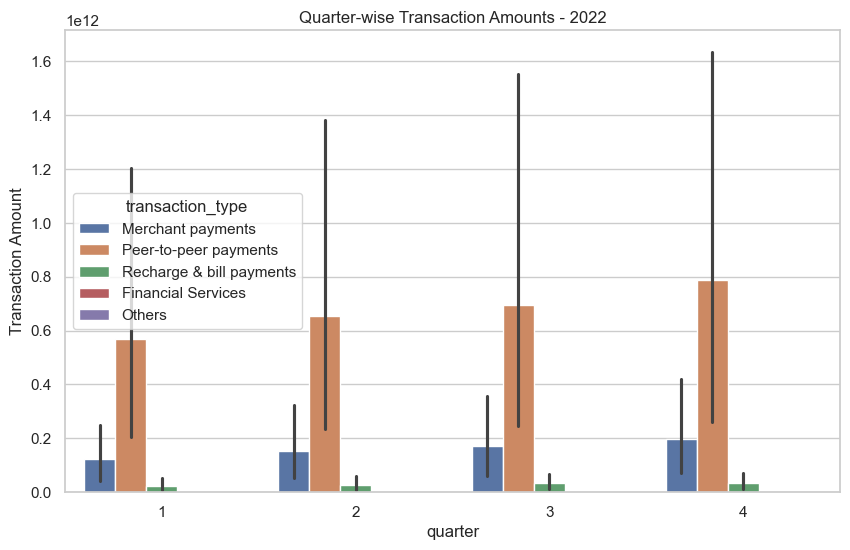

In [5]:
yearly_data = a_transaction[a_transaction['year'] == 2022]

plt.figure(figsize=(10,6))
sns.barplot(data=yearly_data, x='quarter', y='transaction_amount', hue='transaction_type')
plt.title("Quarter-wise Transaction Amounts - 2022")
plt.ylabel("Transaction Amount")
plt.show()

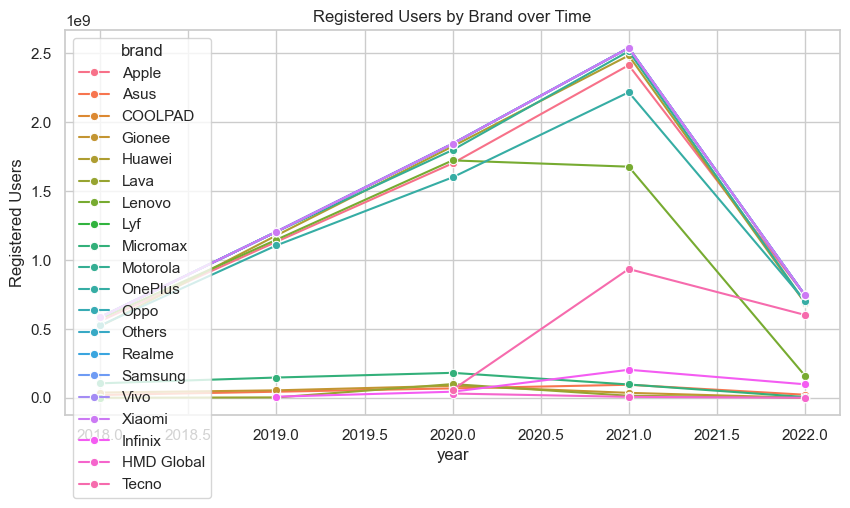

In [6]:
user_brand = a_user.groupby(['year', 'brand'])['registeredUsers'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=user_brand, x='year', y='registeredUsers', hue='brand', marker='o')
plt.title("Registered Users by Brand over Time")
plt.ylabel("Registered Users")
plt.show()

In [7]:
map_sample = m_transaction[(m_transaction['year'] == 2022) & (m_transaction['quarter'] == 4)]
map_sample[['state_name', 'amount', 'count']].sort_values(by='amount', ascending=False).head(10)

,state_name,amount,count
707,telangana,2.978253e+12,1819506832
692,maharashtra,2.210471e+12,1688775272
705,karnataka,1.904517e+12,1378910371
18006,telangana,1.753799e+12,1133829812
697,rajasthan,1.456957e+12,865574848
688,andhra pradesh,1.424725e+12,690017077
686,uttar pradesh,1.376379e+12,836369071
687,madhya pradesh,1.303000e+12,898828268
9164,karnataka,1.092079e+12,876647100
703,bihar,9.360121e+11,517084649


## 📌 Insights Summary

- **Massive Growth**: Transaction volume has grown rapidly year over year, especially post-2020.
- **Top States**: Maharashtra, Karnataka, and Uttar Pradesh consistently rank highest.
- **Strong Q4 Trends**: Many transaction types peak in the 4th quarter each year.
- **User Growth**: Reliance Jio and Samsung dominate the user base.
- **Map View**: States like Maharashtra and Karnataka dominate financial activity.
